In [3]:
pip install librosa kaggle

In [ ]:
# kagglehub.dataset_download() → Downloads dataset from Kaggle automatically.

# glob() → Searches and returns all file paths matching a pattern (e.g., all .wav files).

# librosa.load() → Loads an audio file and returns:
#    y  = waveform (audio samples)
#    sr = sample rate (samples per second)

# pd.Series().plot() → Plots the audio waveform as a graph.

# librosa.effects.trim() → Removes silence from start and end of the audio clip.

# librosa.stft() → Short-Time Fourier Transform:
#     Converts audio from time domain to frequency domain (for spectrogram).

# librosa.amplitude_to_db() → Converts amplitude values into decibels (makes spectrogram readable).

# librosa.display.specshow() → Displays the spectrogram as an image.

# plt.show() → Shows the plot/graph.

# MFCCs → Capture voice tone and speech shape (most important for speech/emotion recognition).

# Chroma → Represents harmonic and pitch information of the voice.

# Mel Spectrogram → Shows energy in different frequency bands (used in deep learning).

# Zero Crossing Rate (ZCR) → Measures noisiness or sharpness of the voice.

# Spectral Centroid → Indicates brightness of the sound (higher = sharper tone).


In [4]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
from itertools import cycle


# --- STEP 1: SETUP AND STYLE ---
# Set the aesthetic style for the plots
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [14]:
# --- STEP 2: DOWNLOAD AND LOCATE DATA ---
# Download the dataset
path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")
print("Path to dataset files:", path)

# Find all .wav files in the downloaded directory (Recursive search)
audio_files = glob(f"{path}/**/*.wav", recursive=True)


Using Colab cache for faster access to the 'ravdess-emotional-speech-audio' dataset.
Path to dataset files: /kaggle/input/ravdess-emotional-speech-audio


In [7]:
# --- STEP 3: LOAD AUDIO ---
# Load the first audio file found
# y = raw audio data (waveform), sr = sample rate
y, sr = librosa.load(audio_files[0])

print(f'y: {y[:10]}')      # Print first 10 numbers of the audio data
print(f'shape y: {y.shape}') # Print the total number of data points
print(f'sr: {sr}')         # Print the sample rate (Hz)


y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (77988,)
sr: 22050


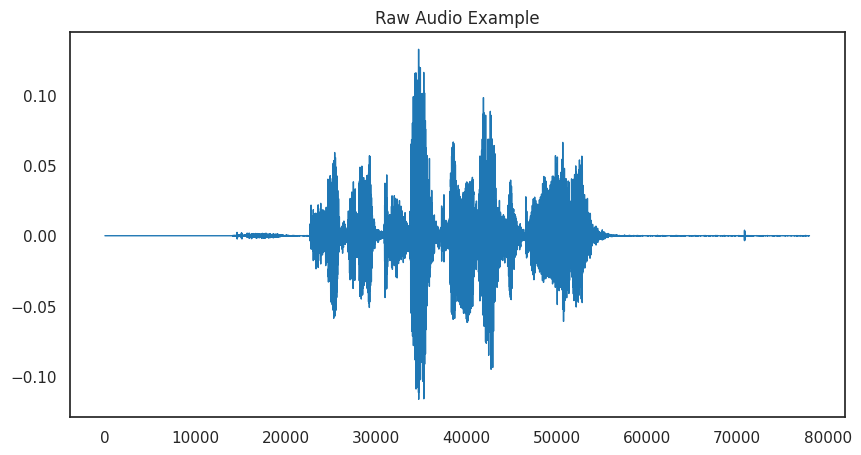

In [8]:
# --- STEP 4: PLOT RAW AUDIO ---
pd.Series(y).plot(figsize=(10, 5), lw=1, title='Raw Audio Example', color=color_pal[0])
plt.show()

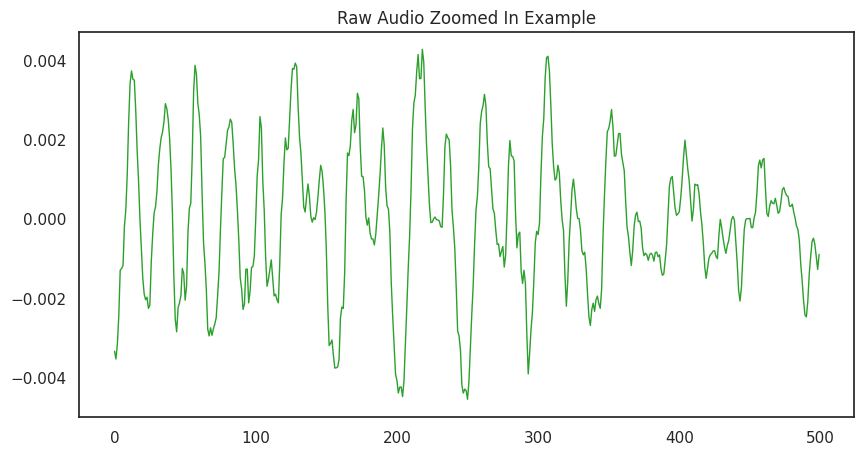

In [9]:
# --- STEP 5: PLOT ZOOMED AUDIO ---
# Looking at a specific small slice of time
pd.Series(y[30000:30500]).plot(figsize=(10, 5),lw=1, title='Raw Audio Zoomed In Example', color=color_pal[2])
plt.show()

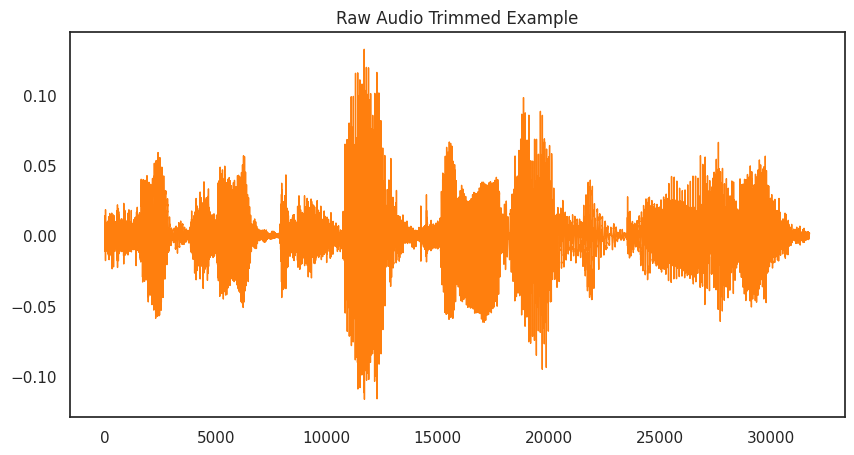

In [10]:
# --- STEP 6: TRIM SILENCE ---
# Remove silence from the beginning and end of the clip
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),lw=1, title='Raw Audio Trimmed Example',color=color_pal[1])
plt.show()

In [11]:
# --- STEP 7: CREATE SPECTROGRAM ---
# Transform audio from Time Domain -> Frequency Domain
D = librosa.stft(y)  # Short-time Fourier transform
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) # Convert to Decibels
print(f'Spectrogram shape: {S_db.shape}')


Spectrogram shape: (1025, 153)


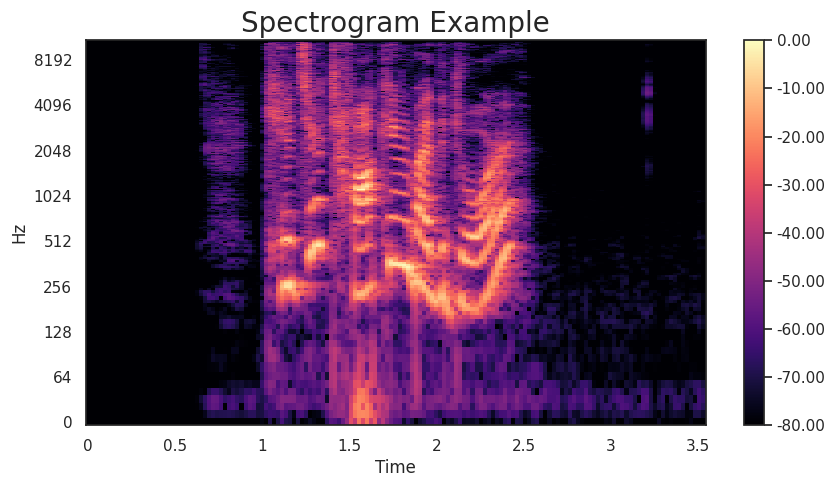

In [12]:
# --- STEP 8: PLOT SPECTROGRAM ---
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [13]:
# --- EXTRA STEP: Extract useful audio features ---

# MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print("MFCCs shape:", mfccs.shape)

# Chroma
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
print("Chroma shape:", chroma.shape)

# Mel Spectrogram
mel = librosa.feature.melspectrogram(y=y, sr=sr)
print("Mel Spectrogram shape:", mel.shape)

# Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y)
print("ZCR shape:", zcr.shape)

# Spectral Centroid
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
print("Spectral Centroid shape:", centroid.shape)


MFCCs shape: (13, 153)
Chroma shape: (12, 153)
Mel Spectrogram shape: (128, 153)
ZCR shape: (1, 153)
Spectral Centroid shape: (1, 153)
